In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./drive/MyDrive/TimeSeries/daily-minimum-temperatures-in-me.csv")

In [3]:
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3650 non-null   object 
 1   Daily minimum temperatures  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
df.rename(columns={"Daily minimum temperatures": "Temperature"}, inplace=True)

In [6]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import IndexLocator

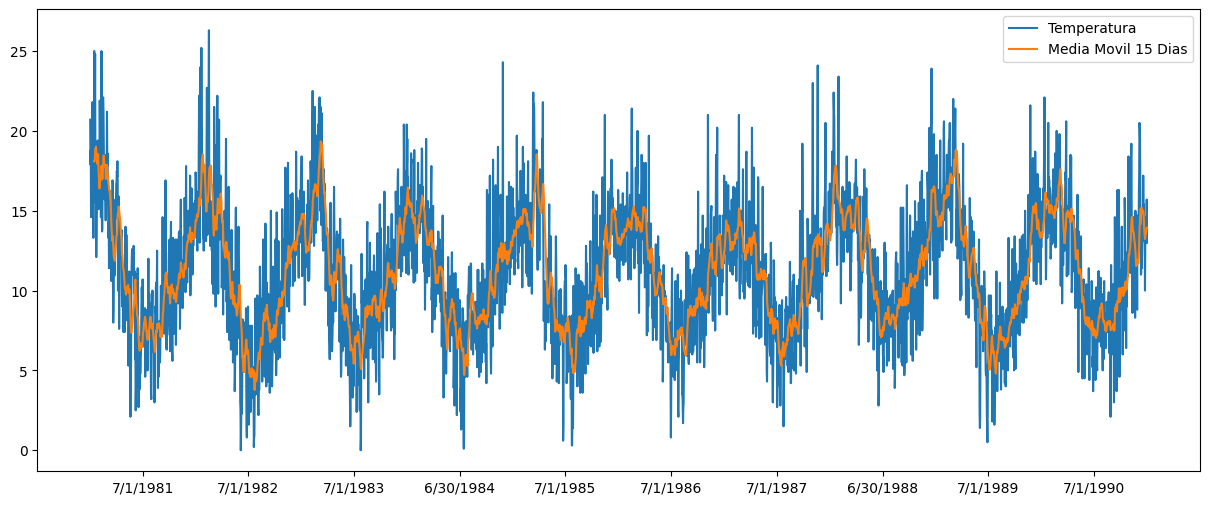

In [8]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df["Date"],df["Temperature"],label="Temperatura")
df['media_movil_15d'] = df['Temperature'].rolling(window=15).mean()
ax.plot(df["Date"],df["media_movil_15d"],label="Media Movil 15 Dias")

locator = IndexLocator(base=365, offset=181)
ax.xaxis.set_major_locator(locator)

plt.legend()
plt.show()

In [9]:
len(df["Temperature"])/7

521.4285714285714

In [10]:
df = df.drop("media_movil_15d", axis=1)

In [11]:
# Convert the date column to a datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample the daily data into weekly intervals and calculate the mean temperature
weekly_temps = df.resample('7D').mean()

# Print the resulting weekly temperature data
print(weekly_temps.head())

            Temperature
Date                   
1981-01-01    17.057143
1981-01-08    18.128571
1981-01-15    20.357143
1981-01-22    16.328571
1981-01-29    17.414286


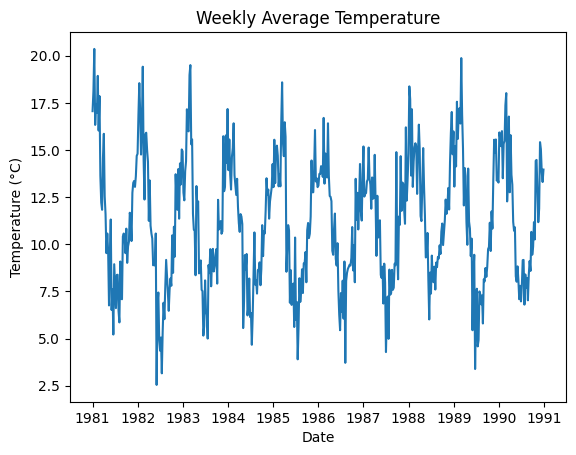

In [12]:
plt.plot(weekly_temps)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Weekly Average Temperature')
plt.show()

In [13]:
dif = [0] * len(weekly_temps['Temperature'])

for i in range(len(weekly_temps['Temperature'])-1):
  dif[i+1] = weekly_temps['Temperature'][i+1] - weekly_temps['Temperature'][i]

In [14]:
weekly_temps['Dif_temp']=dif

In [53]:
dif_2 = [0] * len(weekly_temps['Dif_temp'])

for i in range(len(weekly_temps['Dif_temp'])-52):
  dif_2[i+52] = weekly_temps['Dif_temp'][i+52] - weekly_temps['Dif_temp'][i]

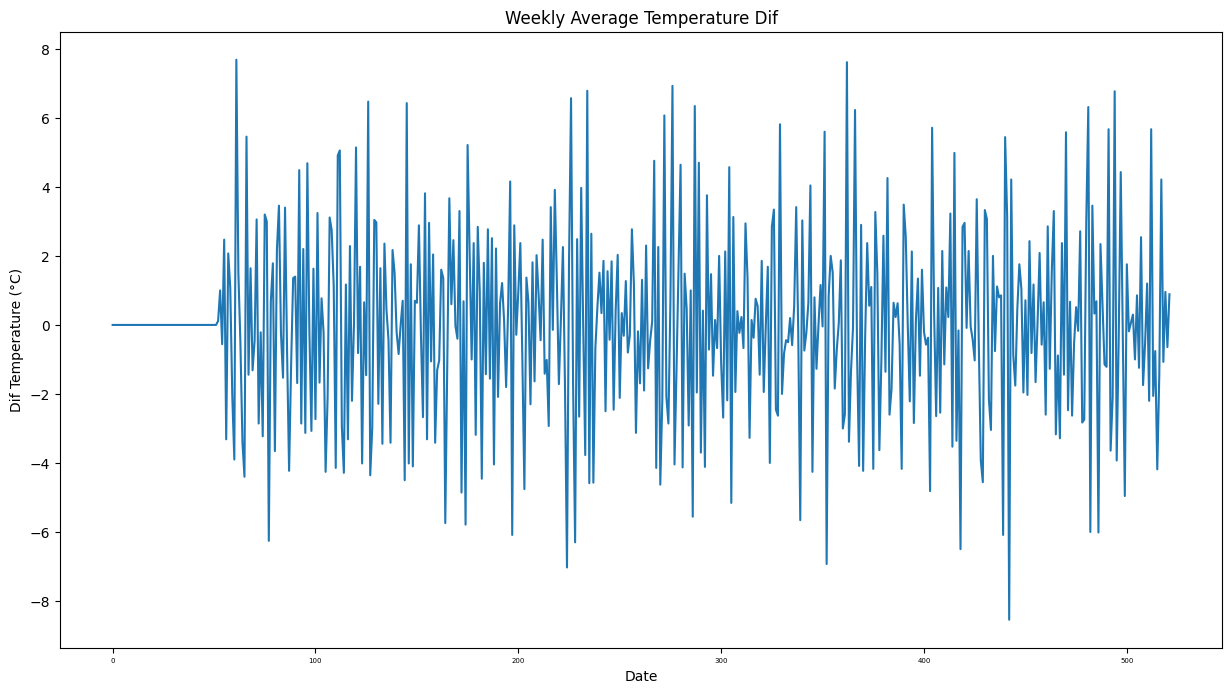

In [54]:
plt.plot(dif_2)
plt.xlabel('Date')
plt.ylabel('Dif Temperature (°C)')
plt.title('Weekly Average Temperature Dif')
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                        Temperature   No. Observations:                  522
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -949.781
Date:                            Thu, 20 Apr 2023   AIC                           1905.562
Time:                                    20:55:16   BIC                           1918.014
Sample:                                01-01-1981   HQIC                          1910.461
                                     - 12-27-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8681      0.021    -40.872      0.000      -0.910      -0.826
ma.S.L52      -0.8186      0.065   

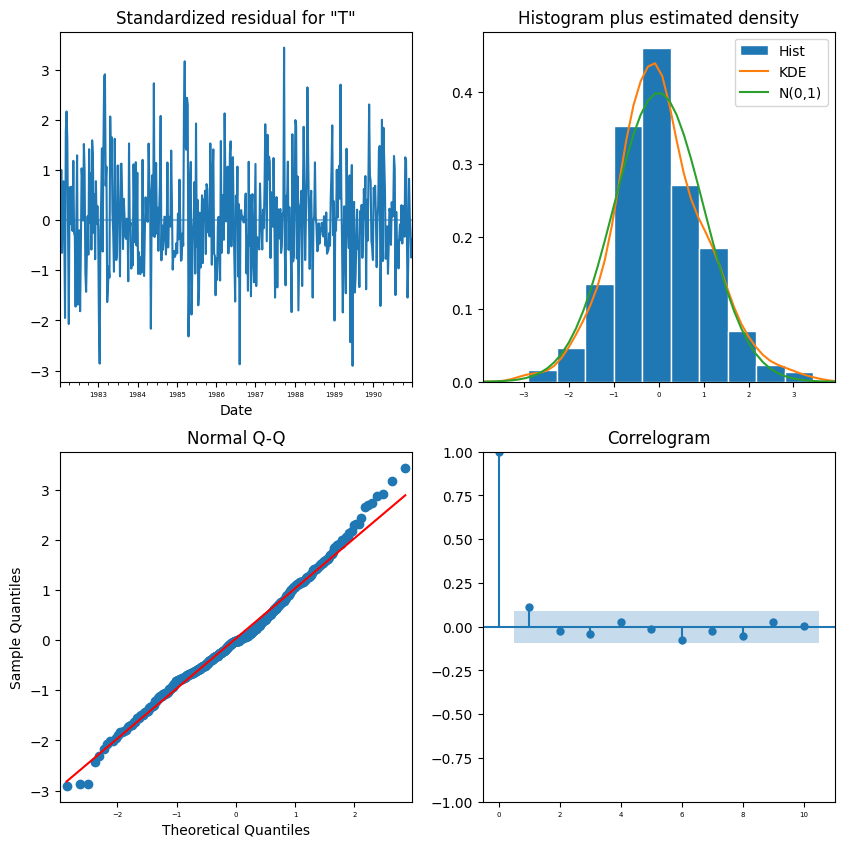

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(weekly_temps['Temperature'], order=(0,1,1), seasonal_order=(0,1,1,52))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

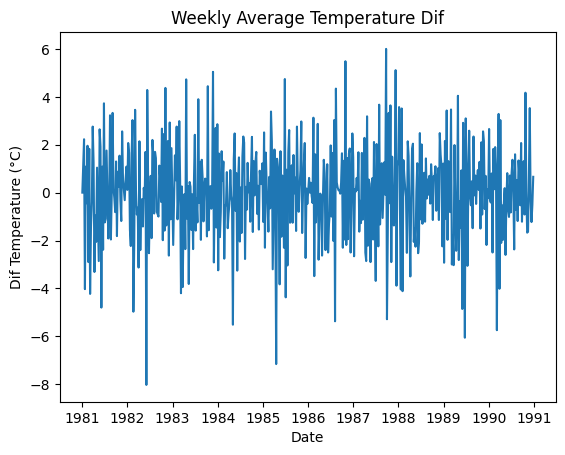

In [15]:
plt.plot(weekly_temps['Dif_temp'])
plt.xlabel('Date')
plt.ylabel('Dif Temperature (°C)')
plt.title('Weekly Average Temperature Dif')
plt.show()

(array([ 13.,  14.,  26.,  35.,  55.,  91., 146., 203., 215., 265., 276.,
        321., 271., 284., 275., 269., 215., 186., 181., 105.,  61.,  39.,
         32.,  31.,  17.,  12.,   3.,   4.,   4.,   1.]),
 array([ 0.        ,  0.87666667,  1.75333333,  2.63      ,  3.50666667,
         4.38333333,  5.26      ,  6.13666667,  7.01333333,  7.89      ,
         8.76666667,  9.64333333, 10.52      , 11.39666667, 12.27333333,
        13.15      , 14.02666667, 14.90333333, 15.78      , 16.65666667,
        17.53333333, 18.41      , 19.28666667, 20.16333333, 21.04      ,
        21.91666667, 22.79333333, 23.67      , 24.54666667, 25.42333333,
        26.3       ]),
 <BarContainer object of 30 artists>)

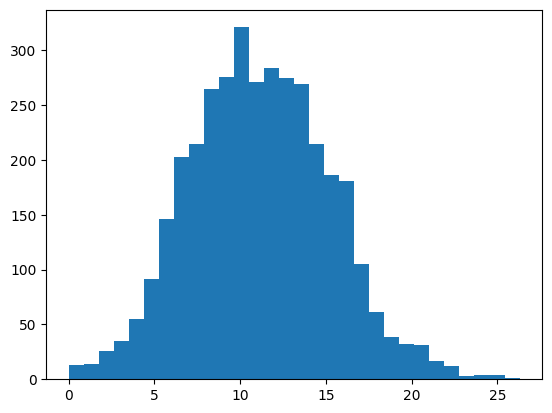

In [16]:
_,ax1=plt.subplots()
ax1.hist(df["Temperature"],bins=30)

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

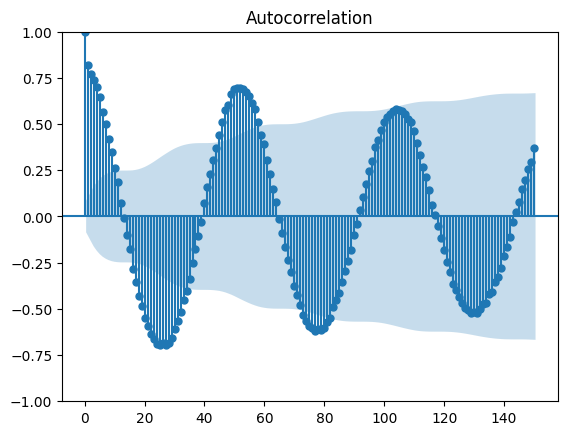

[ 1.          0.82014639  0.77363634  0.73611901  0.69917805  0.6446509
  0.56449281  0.50176943  0.42173581  0.34763202  0.26148091  0.18613271
  0.07241141 -0.00954393 -0.10140788 -0.1782816  -0.28241005 -0.35304209
 -0.43135281 -0.48685815 -0.549351   -0.59006031 -0.63502407 -0.66522971
 -0.68861091 -0.6972863  -0.6842908  -0.69515325 -0.68439088 -0.65862808
 -0.60753083 -0.56327808 -0.51956733 -0.45367415 -0.40230506 -0.33595501
 -0.25050976 -0.17586289 -0.10347997 -0.03174734  0.07290534  0.15988038
  0.2308551   0.3054233   0.36849907  0.43998203  0.51016155  0.57422401
  0.60229095  0.66090326  0.69136256  0.6969104   0.6950581   0.69016778
  0.67555374  0.65014463  0.61392749  0.58323633  0.51355623  0.44053193
  0.39157663  0.30660011  0.2314417   0.14928027  0.07892686 -0.01342993
 -0.09150472 -0.16308292 -0.23528184 -0.30095346 -0.37772874 -0.42256654
 -0.4780507  -0.53238807 -0.567979   -0.59306349 -0.601873   -0.61781643
 -0.6076966  -0.61224628 -0.60343141 -0.57318189 -0.

In [18]:
plot_acf(weekly_temps['Temperature'], lags=150)
plt.show()
acf_vals = acf(weekly_temps['Temperature'], nlags=150)
print(acf_vals)

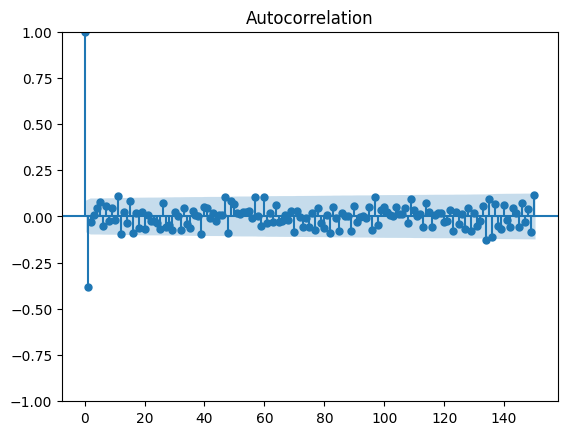

In [19]:
plot_acf(weekly_temps['Dif_temp'], lags=150)
plt.show()
acf_vals = acf(weekly_temps['Dif_temp'], nlags=150)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


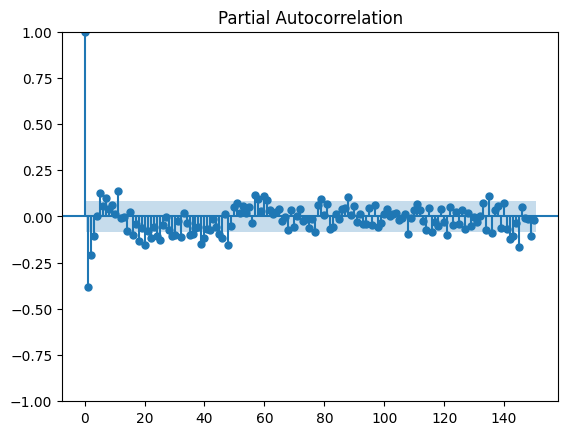

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
plot_pacf(weekly_temps['Dif_temp'], lags=150)
plt.show()
pacf_vals = pacf(weekly_temps['Dif_temp'], nlags=150)


In [21]:
import statsmodels.api as sm

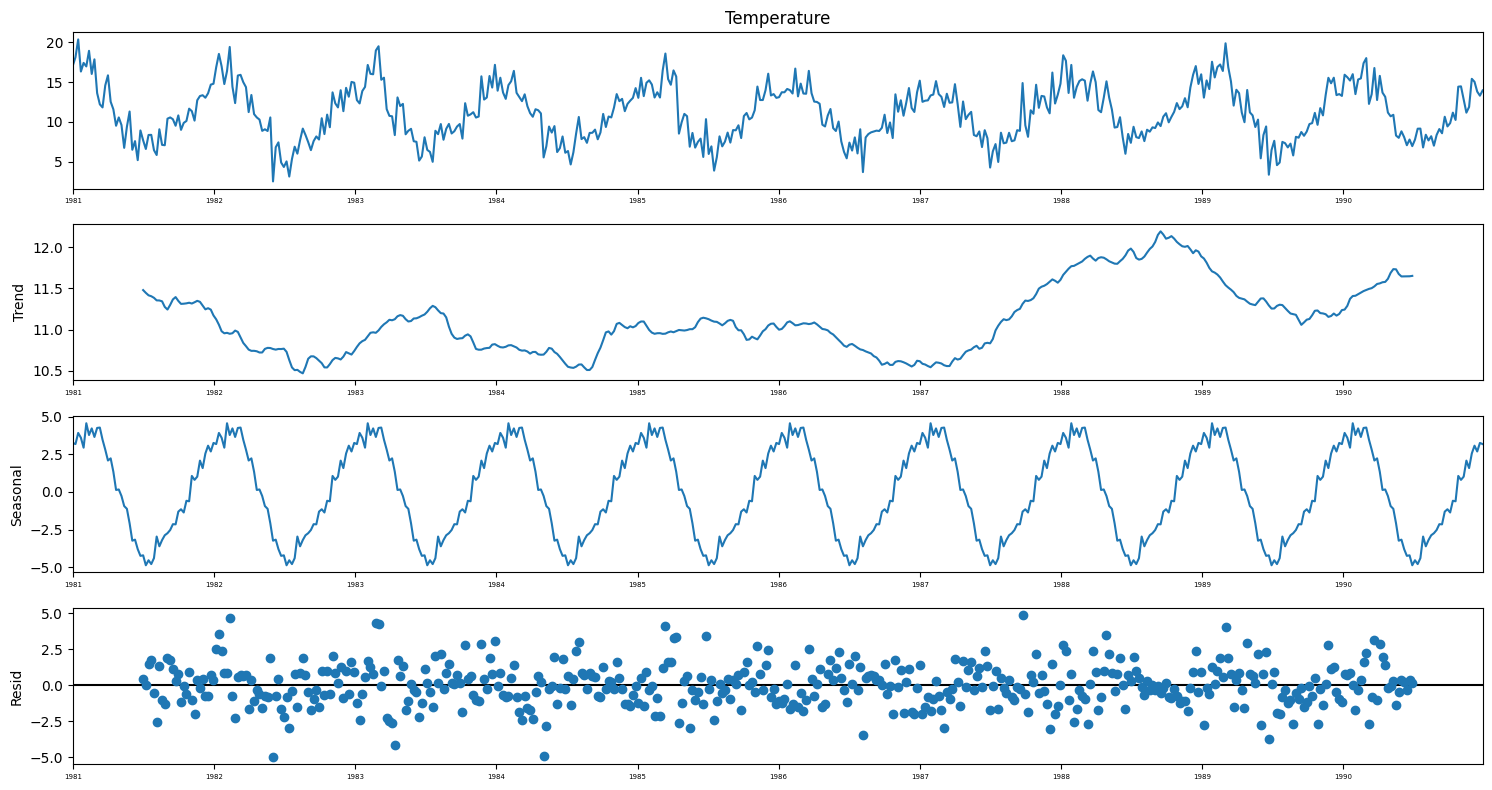

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
rcParams['axes.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['xtick.labelsize'] = 5
decomposition = sm.tsa.seasonal_decompose(weekly_temps['Temperature'], model='additive',period=52)
decomp = decomposition.plot()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adfuller(weekly_temps["Temperature"])

(-9.380112539193524,
 6.994154475206557e-16,
 19,
 502,
 {'1%': -3.4434437319767452,
  '5%': -2.8673146875484368,
  '10%': -2.569845688481135},
 1928.5801105556388)

Al ser pvalor menor a 0.05 rechazo H0 y es estacionaria segun dicky fuller

In [25]:
from statsmodels.tsa.stattools import kpss

In [26]:
kpss(weekly_temps["Temperature"])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.026164902307116752,
 0.1,
 15,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

quiero que mi pvalor sea mayor a 0.05 y es 0.1, por lo tanto no rechazo H0

In [59]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(weekly_temps['Temperature'], order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                  522
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1049.797
Date:                Thu, 20 Apr 2023   AIC                           2107.595
Time:                        21:01:56   BIC                           2124.625
Sample:                    01-01-1981   HQIC                          2114.265
                         - 12-27-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4642      0.815     14.068      0.000       9.867      13.061
ar.L1          0.9474      0.016     59.974      0.000       0.916       0.978
ma.L1         -0.4239      0.049     -8.663      0.0

In [28]:
model = ARIMA(weekly_temps['Dif_temp'], order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Dif_temp   No. Observations:                  522
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1054.818
Date:                Thu, 20 Apr 2023   AIC                           2117.635
Time:                        20:13:42   BIC                           2134.666
Sample:                    01-01-1981   HQIC                          2124.306
                         - 12-27-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.045     -0.151      0.880      -0.094       0.081
ar.L1         -0.0489      0.101     -0.482      0.630      -0.248       0.150
ma.L1         -0.4225      0.092     -4.597      0.0

                                     SARIMAX Results                                      
Dep. Variable:                        Temperature   No. Observations:                  522
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 52)   Log Likelihood                -948.452
Date:                            Thu, 20 Apr 2023   AIC                           1902.905
Time:                                    21:06:11   BIC                           1915.363
Sample:                                01-01-1981   HQIC                          1907.806
                                     - 12-27-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2187      0.042      5.146      0.000       0.135       0.302
ma.S.L52      -0.7848      0.056   

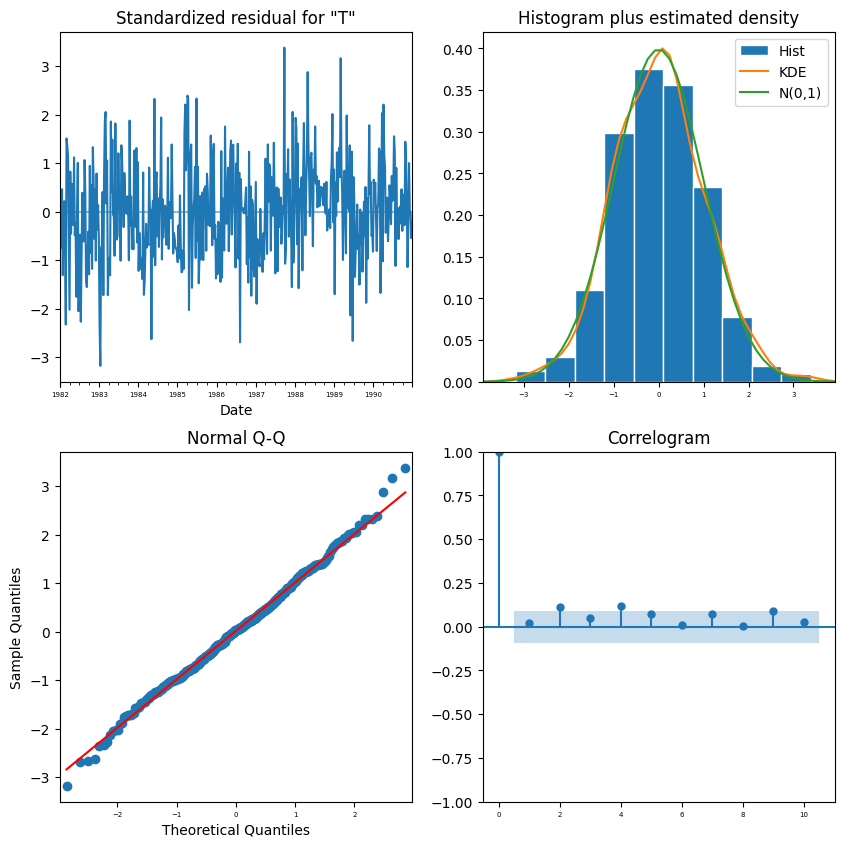

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(weekly_temps['Temperature'], order=(0,0,1), seasonal_order=(0,1,1,52))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

El modelo se puede mejorar

                                      SARIMAX Results                                      
Dep. Variable:                         Temperature   No. Observations:                  522
Model:             SARIMAX(0, 0, 3)x(0, 1, [], 52)   Log Likelihood               -1041.008
Date:                             Thu, 20 Apr 2023   AIC                           2090.016
Time:                                     21:07:27   BIC                           2106.627
Sample:                                 01-01-1981   HQIC                          2096.551
                                      - 12-27-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2006      0.047      4.281      0.000       0.109       0.292
ma.L2          0.0504      

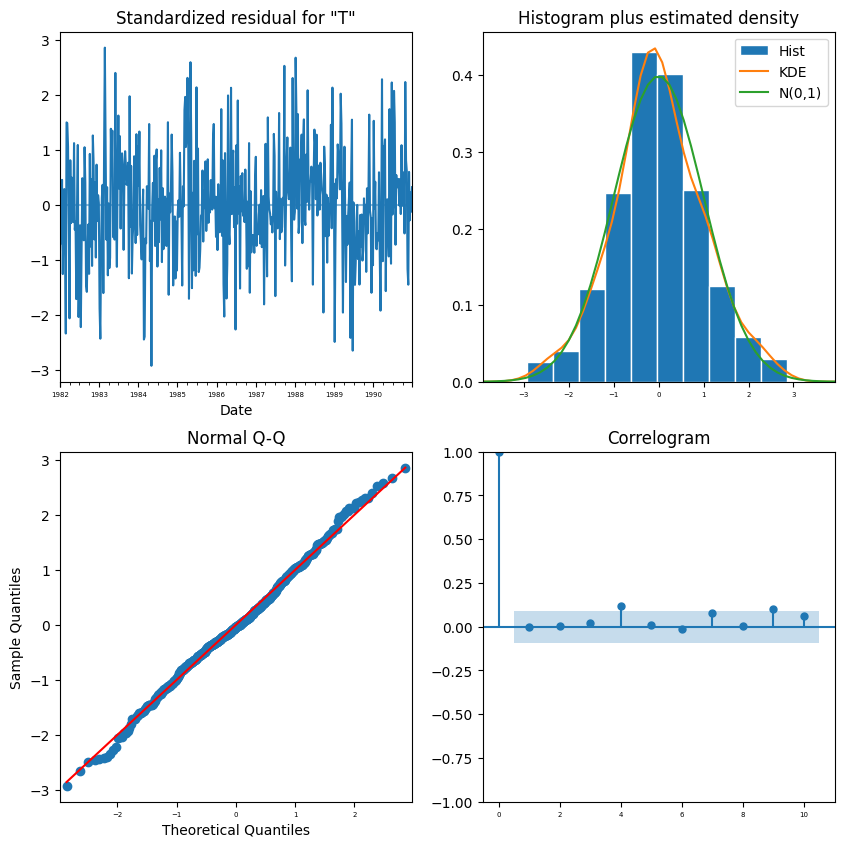

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(weekly_temps['Temperature'], order=(0,0,3), seasonal_order=(0,1,0,52))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

Un gráfico de residuos estandarizados frente a los valores ajustados del modelo. Este gráfico ayuda a detectar problemas de heterocedasticidad (varianza no constante) y no linealidad. Podemos ver que estan bastante bien.

Un histograma de los residuos estandarizados. Este gráfico ayuda a verificar si los residuos se distribuyen normalmente, lo cual en este caso se cumple.

Un gráfico Q-Q (quantile-quantile) de los residuos estandarizados. Este gráfico ayuda a verificar si los residuos se distribuyen normalmente.

Un gráfico de autocorrelación de los residuos. Este gráfico ayuda a detectar problemas de autocorrelación (correlación entre los residuos).

In [ ]:
model = SARIMAX(weekly_temps['Dif_temp'], order=(0,0,1), seasonal_order=(0,1,1,52))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Dif_temp   No. Observations:                  522
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 52)   Log Likelihood                -951.482
Date:                            Thu, 20 Apr 2023   AIC                           1908.963
Time:                                    03:29:17   BIC                           1921.422
Sample:                                01-01-1981   HQIC                          1913.865
                                     - 12-27-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8632      0.021    -40.416      0.000      -0.905      -0.821
ma.S.L52      -0.8202      0.065   

In [ ]:
from scipy.stats import boxcox

In [ ]:
min(weekly_temps['Dif_temp'])

-8.028571428571428

In [ ]:
weekly_temps['Dif_temp_bc'], lam = boxcox(weekly_temps['Dif_temp']-min(weekly_temps['Dif_temp'])+1)

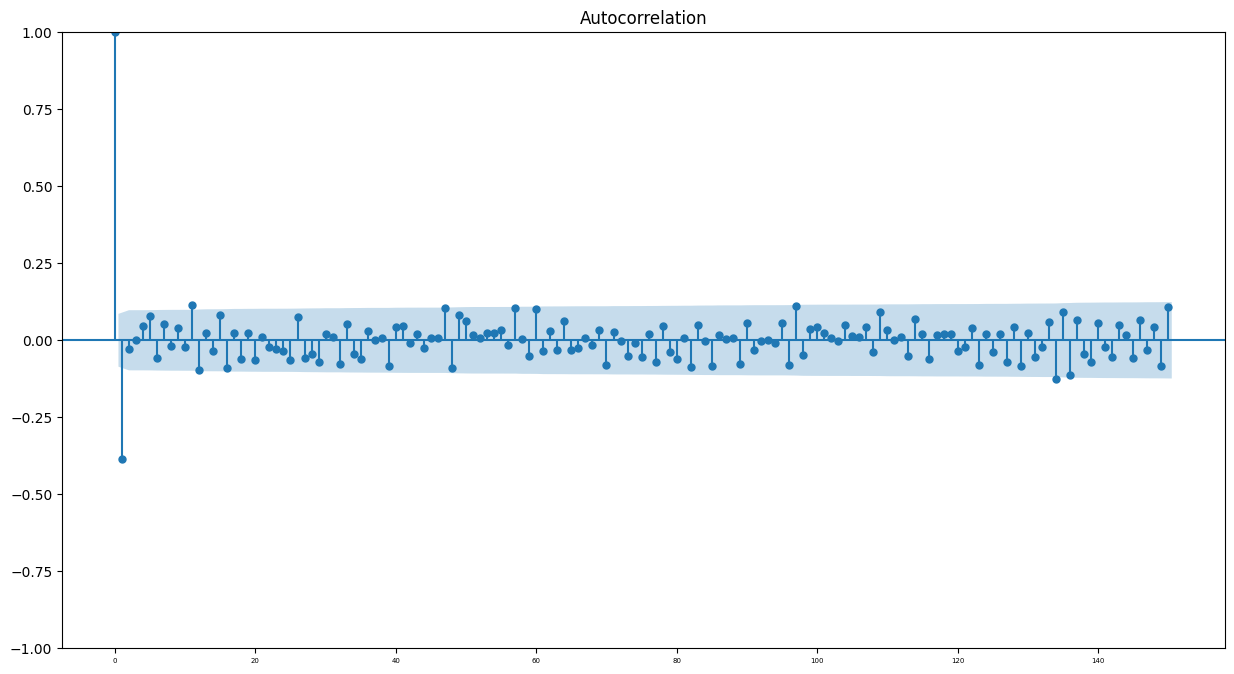

In [ ]:
plot_acf(weekly_temps['Dif_temp_bc'], lags=150)
plt.show()
acf_vals = acf(weekly_temps['Dif_temp_bc'], nlags=150)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


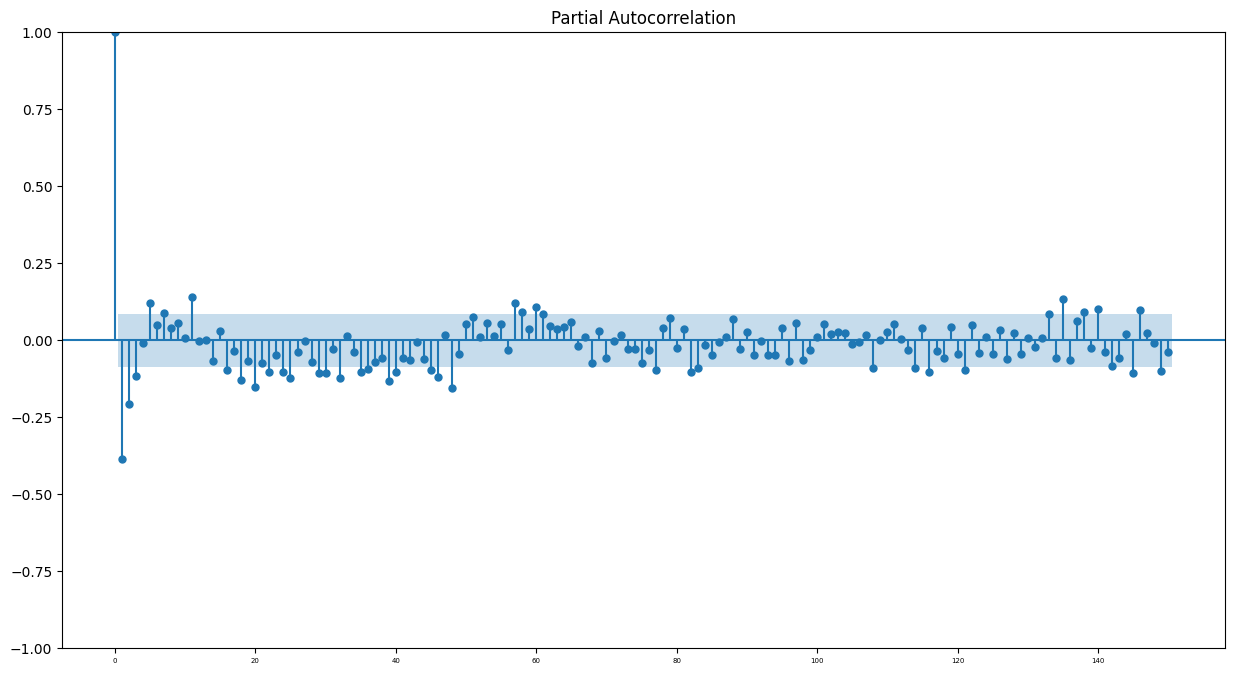

In [ ]:
plot_pacf(weekly_temps['Dif_temp_bc'], lags=150)
plt.show()
pacf_vals = pacf(weekly_temps['Dif_temp_bc'], nlags=150)

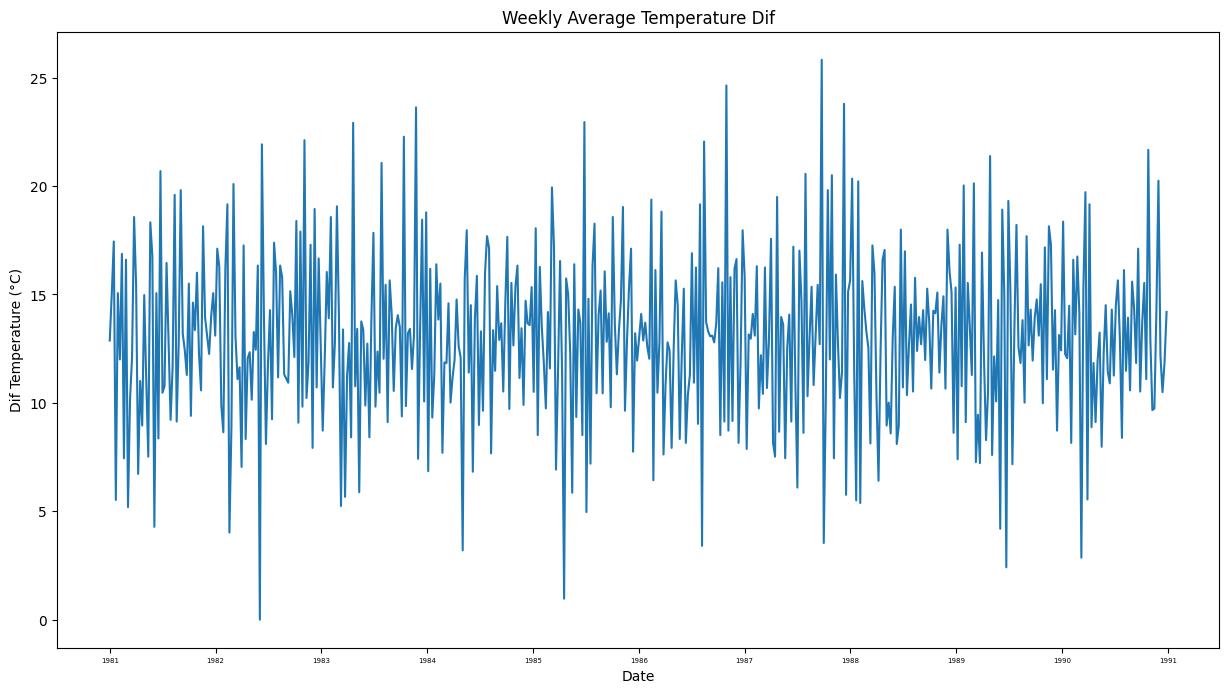

In [ ]:
plt.plot(weekly_temps['Dif_temp_bc'])
plt.xlabel('Date')
plt.ylabel('Dif Temperature (°C)')
plt.title('Weekly Average Temperature Dif')
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(weekly_temps['Dif_temp_bc'], order=(0,0,1), seasonal_order=(0,1,1,52))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Dif_temp_bc   No. Observations:                  522
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 52)   Log Likelihood               -1266.948
Date:                            Thu, 20 Apr 2023   AIC                           2539.897
Time:                                    03:29:27   BIC                           2552.355
Sample:                                01-01-1981   HQIC                          2544.798
                                     - 12-27-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8498      0.023    -36.593      0.000      -0.895      -0.804
ma.S.L52      -0.8307      0.069   

Determino que el mejor modelo es un SARIMAX con order (0,0,1) y seasonal_order (0,1,1,52) para la variable Temperatura, sin diferenciar ni aplicar boxcox

In [63]:
# evaluate an SARIMAX model using a walk-forward validation
X = weekly_temps.Temperature.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print(len(test))
# walk-forward validation


178


In [33]:
for t in range(len(test)):
	model = SARIMAX(history, order=(0,0,3), seasonal_order=(0,1,0,52))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))

Test RMSE: 2.253


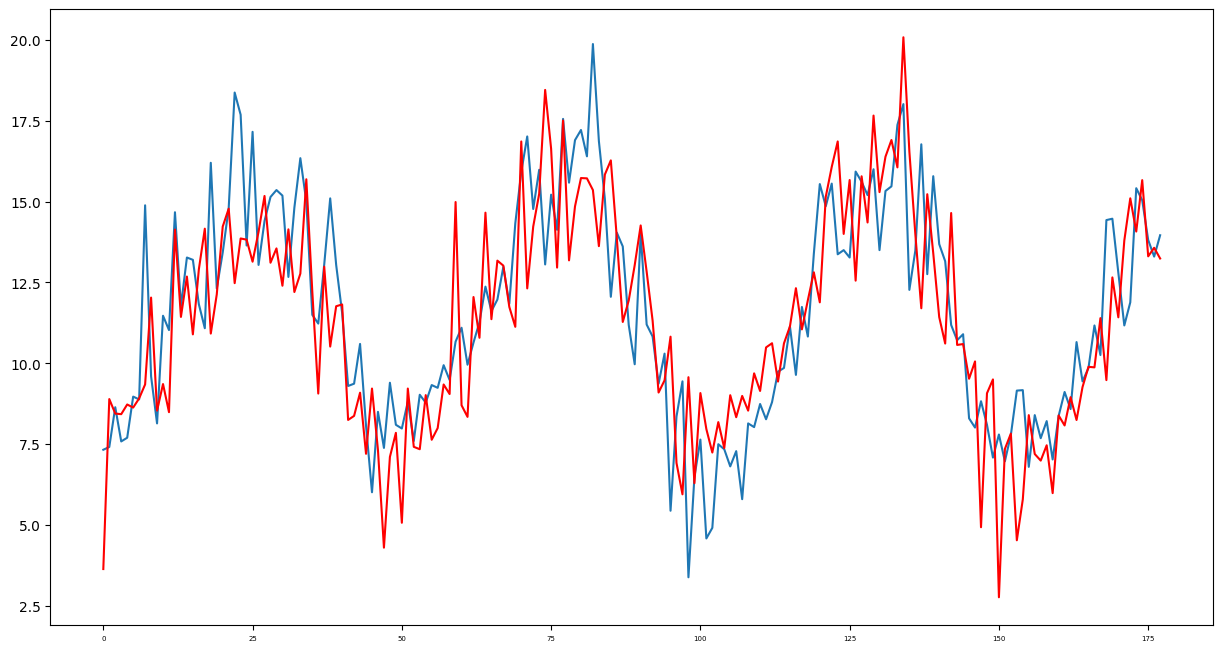

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate forecast
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [68]:
predictions = list()
for t in range(len(test)):
  model = SARIMAX(history, order=(0,0,3), seasonal_order=(0,1,0,52))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(yhat)

Test RMSE: 3.460


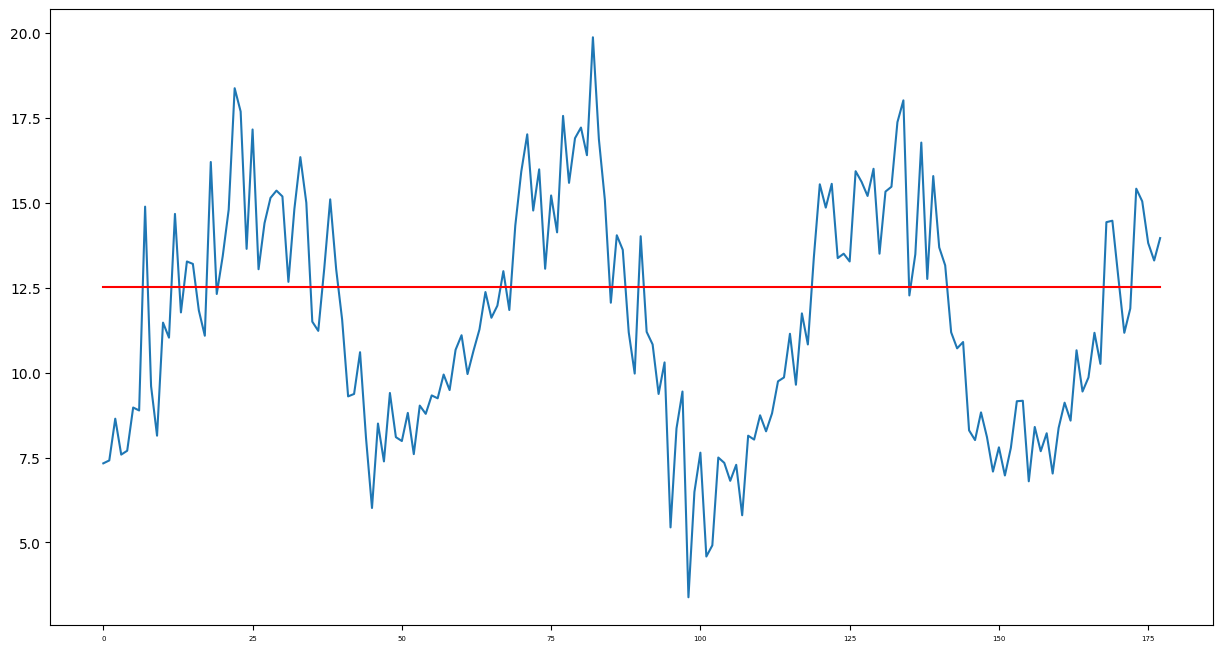

In [67]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [113]:
import numpy as np
X_train= []
y_train= []
X_test= []
y_test= []
for i in range(size-7):
  X_train.append(train[i:i+7])
  y_train.append([train[i+7]])
for i in range(len(test)-7):
  X_test.append(test[i:i+7])
  y_test.append([test[i+7]])
X_train= np.asarray(X_train)
y_train= np.asarray(y_train)
X_test= np.asarray(X_test)
y_test= np.asarray(y_test)

In [46]:
model = Sequential()

In [114]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import keras

#Crear el modelo secuencial
model = Sequential()

model.add(LSTM(64,activation='relu', input_shape = (7 , 1), return_sequences = True )) 
model.add(Dropout(0.15))
model.add(LSTM(64,activation='relu', return_sequences = True))
model.add(LSTM(8,activation='relu')) # La última capa LSTM no lleva return_sequences
model.add(Dense(1))

# Crear el modelo utilizando el optimizador recomendado por la documentación de keras
optimizer = keras.optimizers.Adam(learning_rate=0.01)

# Compilar el modelo con la función de pérdida requerida
model.compile(loss='mean_squared_error', optimizer=optimizer) #elijo usar el error cuadrático medio como función de pérdida

In [115]:

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Evaluar el modelo en los datos de prueba
score = model.evaluate(X_test, y_test, batch_size=16)
print(f'Score net: {score}')

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

Epoch 1/100
22/22 [==============================] - 5s 43ms/step - loss: 29.3601
Epoch 2/100
22/22 [==============================] - 1s 44ms/step - loss: 8.6239
Epoch 3/100
22/22 [==============================] - 1s 44ms/step - loss: 6.5490
Epoch 4/100
22/22 [==============================] - 1s 44ms/step - loss: 6.7930
Epoch 5/100
22/22 [==============================] - 1s 44ms/step - loss: 7.8923
Epoch 6/100
22/22 [==============================] - 2s 78ms/step - loss: 6.2946
Epoch 7/100
22/22 [==============================] - 2s 100ms/step - loss: 5.1697
Epoch 8/100
22/22 [==============================] - 1s 62ms/step - loss: 5.1982
Epoch 9/100
22/22 [==============================] - 1s 43ms/step - loss: 4.7784
Epoch 10/100
22/22 [==============================] - 1s 43ms/step - loss: 5.1418
Epoch 11/100
22/22 [==============================] - 1s 43ms/step - loss: 5.2518
Epoch 12/100
22/22 [==============================] - 1s 43ms/step - loss: 6.0925
Epoch 13/100
22/22 [===

Test RMSE: 2.075


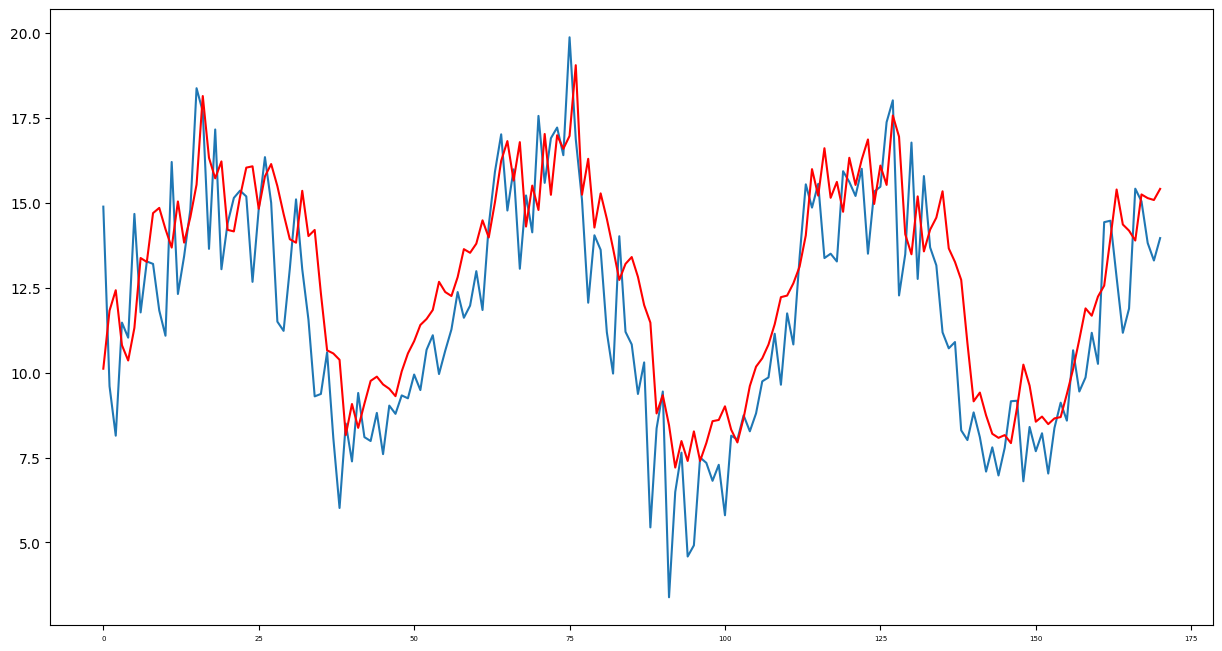

In [116]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(y_test)
plt.plot(y_pred, color='red')
plt.show()

In [69]:
from scipy import signal

In [103]:
G,Pyy_dnn = signal.periodogram(weekly_temps["Temperature"].values)

Text(0.5, 0, 'Frecuencia')

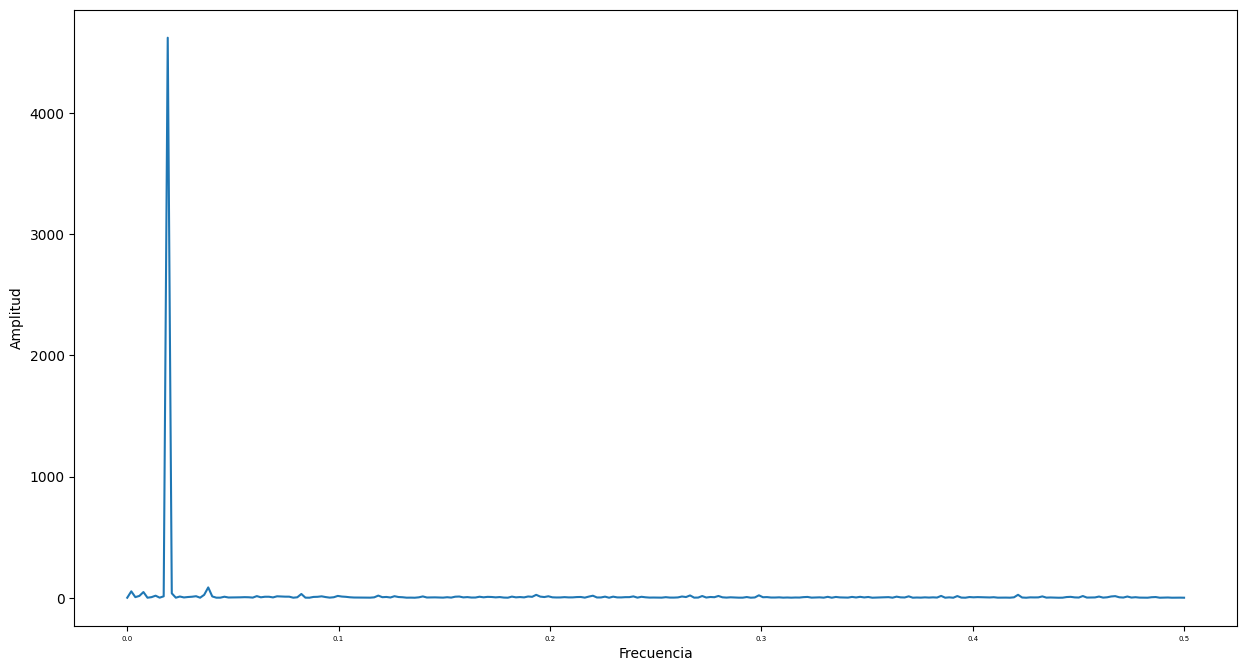

In [104]:
plt.plot(G,Pyy_dnn)
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia')

Tengo una frecuencia principal en 0.019 que se corresponde con mi ciclo de 52 y una frecuencia menor en 0.039 que sería la frecuencia que podemos ver como ruido en la representacion de la serie.